In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [68]:
import torch
from torch.utils.data import DataLoader
import torchvision

Source: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## Image Data Set

In [69]:
data = torchvision.datasets.FashionMNIST(root="data", download=True)

In [70]:
image, tag = data[0]

In [71]:
image

In [72]:
tag

9

In [73]:
image, tag = data[1]

In [74]:
image

In [55]:
tag

0

In [75]:
data.classes # got this from help(data)

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [76]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    target_transform=lambda tag: data.classes[tag],
)

In [58]:
data[0]

(<PIL.Image.Image image mode=L size=28x28>, 'Ankle boot')

In [59]:
data[1]

(<PIL.Image.Image image mode=L size=28x28>, 'T-shirt/top')

In [60]:
data[2]

(<PIL.Image.Image image mode=L size=28x28>, 'T-shirt/top')

In [61]:
image, cls = data[1]

In [91]:
image

In [93]:
image.mode, image.width, image.height, image.size # 8-bit grayscale, see https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes

('L', 28, 28, (28, 28))

In [63]:
# not required here, matplotlib can consume PIL images directly
image_array = np.array(image)
print(image_array.shape, image_array.dtype)
print(image_array)

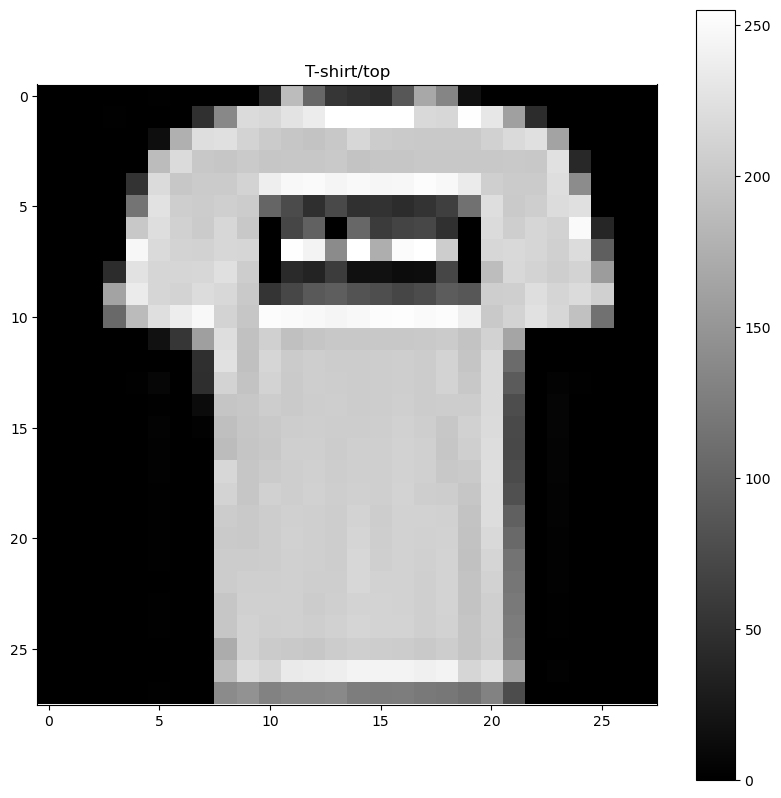

In [94]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.colorbar()
plt.set_cmap("grey")
plt.title(cls)
None

In [99]:
tensor = torch.from_numpy(image_array)

In [100]:
tensor.shape

torch.Size([28, 28])

In [103]:
w, h = tensor.shape
w, h

(28, 28)

In [104]:
tensor.dtype

torch.uint8

In [107]:
tensor[5, 8]

tensor(207, dtype=torch.uint8)

In [118]:
tensor = torchvision.transforms.ToTensor()(image) # Notice strange factory pattern.
# How does this stuff flies when used in datasets transforms?
tensor # Rescaled to [0, 1) (or [0, 1] ?)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882,

In [120]:
tensor.dtype # half-precision

torch.float32

In [126]:
(image_array / 255)[:2]  # Uhu?

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [144]:
tensor.shape # Arf, introduced a batch dimension here
# So they rescale, half-prec and autobatch the stuff.

torch.Size([1, 28, 28])

In [137]:
tensor[0, 0, 5].item()

0.003921568859368563

In [142]:
image_array[0, 5] / 255 # Shit, they map to [0, 1], not [0, 1)

0.00392156862745098

In [143]:
image_array[0, 5] / 256

0.00390625

In [152]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    transform = lambda image: torch.from_numpy(np.array(image) / 256) ,
    target_transform=lambda tag: data.classes[tag],
)

In [159]:
tensor, cls = data[1]

In [160]:
tensor.shape, tensor.dtype

(torch.Size([28, 28]), torch.float64)

In [162]:
tensor[0, 5].item() # better, baby!

0.00390625

In [158]:
tensor

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0508, 0.2852, 0.0000,
         0.0000, 0.0039, 0.0156, 0.0000, 0.0000, 0.0000

In [164]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    transform = torchvision.transforms.ToTensor(), # OK, fine, we instantiate, I get that now.
)

In [169]:
# Nota: to emulate ToTensor:
def T(image):
    array = np.asarray(np.array(image) / 255, dtype=np.float32)
    w, h = array.shape
    t = np.reshape(array, (1, 28, 28))
    return torch.from_numpy(t)
T(image)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882,

In [172]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    transform=T,
)

## Data Loader

In [ ]:
dl = torch.